In [1]:
import pandas

#load Insulin and CGM Data
insulinDf = pandas.read_csv('InsulinData.csv', parse_dates=[['Date','Time']],low_memory=False).iloc[::-1]
cgmDf = pandas.read_csv('CGMData.csv', parse_dates=[['Date','Time']],low_memory=False).iloc[::-1]

insulinDf2 = pandas.read_csv('InsulinAndMealIntake670GPatient3.csv', parse_dates=[['Date','Time']],low_memory=False).iloc[::-1]
cgmDf2 = pandas.read_csv('CGMData670GPatient3.csv', parse_dates=[['Date','Time']],low_memory=False).iloc[::-1]

In [2]:
cgmDf

,Date_Time,Index,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),Bolus Type,...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
55342,2017-07-25 12:08:54,52859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55341,2017-07-25 12:13:54,52858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55340,2017-07-25 12:18:54,52857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55339,2017-07-25 12:23:54,52856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55338,2017-07-25 12:28:54,52855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-02-12 13:02:27,20359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
3,2018-02-12 13:07:27,20358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
2,2018-02-12 13:12:27,20357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
1,2018-02-12 13:17:27,20356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#filter NaNs and Zeros
insulinDFColY = insulinDf[insulinDf['BWZ Carb Input (grams)'].notnull() & insulinDf['BWZ Carb Input (grams)'] != 0]
insulinMealDates = pandas.DataFrame(insulinDFColY['Date_Time'])
insulinMealDates

insulinDFColY2 = insulinDf2[insulinDf2['BWZ Carb Input (grams)'].notnull() & insulinDf2['BWZ Carb Input (grams)'] != 0]
insulinMealDates2 = pandas.DataFrame(insulinDFColY2['Date_Time'])
insulinMealDates2

,Date_Time
23148,2017-05-09 13:14:52
23118,2017-05-09 19:32:06
23114,2017-05-09 19:32:23
23076,2017-06-09 08:48:28
23056,2017-06-09 13:22:26
...,...
435,2018-05-03 11:52:19
381,2018-05-03 17:19:29
230,2018-06-03 10:22:37
215,2018-06-03 12:40:57


In [3]:
#mealStartDates from Insulin CSV
insulinMealDates['Diff'] = insulinMealDates.iloc[:,0].diff(-1).dt.total_seconds().div(3600)
insulinMealDates = insulinMealDates.loc[insulinMealDates['Diff'] <= -2]
insulinNoMealDates = insulinMealDates.loc[insulinMealDates['Diff'] <= -4]
insulinMealDates.drop(insulinMealDates.head(1).index,inplace=True)
insulinMealDates.drop(insulinMealDates.tail(2).index,inplace=True)
insulinNoMealDates.drop(insulinNoMealDates.head(1).index,inplace=True)
insulinNoMealDates.drop(insulinNoMealDates.tail(2).index,inplace=True)
insulinNoMealDates

insulinMealDates2['Diff'] = insulinMealDates2.iloc[:,0].diff(-1).dt.total_seconds().div(3600)
insulinMealDates2 = insulinMealDates2.loc[insulinMealDates2['Diff'] <= -2]
insulinNoMealDates2 = insulinMealDates2.loc[insulinMealDates2['Diff'] <= -4]
insulinMealDates2.drop(insulinMealDates2.head(1).index,inplace=True)
insulinMealDates2.drop(insulinMealDates2.tail(2).index,inplace=True)
insulinNoMealDates2.drop(insulinNoMealDates2.head(1).index,inplace=True)
insulinNoMealDates2.drop(insulinNoMealDates2.tail(2).index,inplace=True)
insulinNoMealDates2

/home/arun/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/arun/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date_Time,Diff
23114,2017-05-09 19:32:23,-733.268056
23076,2017-06-09 08:48:28,-4.566111
23056,2017-06-09 13:22:26,-6.081944
23038,2017-06-09 19:27:21,-708.179444
23014,2017-07-09 07:38:07,-5.264722
...,...,...
552,2018-03-03 20:45:06,-732.037222
536,2018-04-03 08:47:20,-4.086111
528,2018-04-03 12:52:30,-5.757500
510,2018-04-03 18:38:57,-712.006944


In [4]:
mealDatesList = []
for ind in insulinMealDates.index: 
#     print("InsulinMealData : " + str(insulinMealDates['Date_Time'][ind]))
    mealDatesList.append((cgmDf.loc[cgmDf['Date_Time'] >= insulinMealDates['Date_Time'][ind]])['Date_Time'].iloc[0])
mealDatesList

noMealDatesList = []
for ind in insulinNoMealDates.index: 
#     print("InsulinMealData : " + str(insulinMealDates['Date_Time'][ind]))
    noMealDatesList.append((cgmDf.loc[cgmDf['Date_Time'] >= insulinNoMealDates['Date_Time'][ind]])['Date_Time'].iloc[0])
noMealDatesList


mealDatesList2 = []
for ind in insulinMealDates2.index: 
#     print("InsulinMealData : " + str(insulinMealDates['Date_Time'][ind]))
    mealDatesList2.append((cgmDf2.loc[cgmDf2['Date_Time'] >= insulinMealDates2['Date_Time'][ind]])['Date_Time'].iloc[0])
mealDatesList2

noMealDatesList2 = []
for ind in insulinNoMealDates2.index: 
#     print("InsulinMealData : " + str(insulinMealDates['Date_Time'][ind]))
    noMealDatesList2.append((cgmDf2.loc[cgmDf2['Date_Time'] >= insulinNoMealDates2['Date_Time'][ind]])['Date_Time'].iloc[0])
noMealDatesList2

[Timestamp('2017-05-09 19:36:23'),
 Timestamp('2017-06-09 08:51:26'),
 Timestamp('2017-06-09 13:26:28'),
 Timestamp('2017-06-09 19:31:29'),
 Timestamp('2017-07-09 07:41:32'),
 Timestamp('2017-07-09 12:56:33'),
 Timestamp('2017-07-09 19:51:35'),
 Timestamp('2017-08-09 08:21:38'),
 Timestamp('2017-08-09 13:21:39'),
 Timestamp('2017-08-09 20:31:41'),
 Timestamp('2017-09-09 07:11:43'),
 Timestamp('2017-09-09 13:06:45'),
 Timestamp('2017-09-09 19:01:46'),
 Timestamp('2017-10-09 15:41:51'),
 Timestamp('2017-10-09 19:51:53'),
 Timestamp('2017-11-09 08:06:55'),
 Timestamp('2017-11-09 12:16:57'),
 Timestamp('2017-11-09 19:46:58'),
 Timestamp('2017-12-09 07:37:01'),
 Timestamp('2017-12-09 13:03:50'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-09 00:01:48'),
 Timestamp('2017-10-

In [6]:
cgmDf.shape[0]

55343

In [6]:
mealDataMatrix = []
for mealDateTime in mealDatesList:
    idx = cgmDf[cgmDf['Date_Time'] == mealDateTime]['Sensor Glucose (mg/dL)'].index[0]
    mealDataMatrix.append(list(cgmDf['Sensor Glucose (mg/dL)'].iloc[cgmDf.shape[0]-1-idx:cgmDf.shape[0]-1-idx+24].values))
mealDataMatrix

noMealDataMatrix = []
for noMealDateTime in noMealDatesList:
    idx = cgmDf[cgmDf['Date_Time'] == noMealDateTime]['Sensor Glucose (mg/dL)'].index[0]
    noMealDataMatrix.append(list(cgmDf['Sensor Glucose (mg/dL)'].iloc[cgmDf.shape[0]-1-idx+24:cgmDf.shape[0]-1-idx+48].values))

# idx = cgmDf['Date_Time'].loc[lambda x: x=='2017-07-28 21:39:14'].index
# idx
# (cgmDf.iloc[idx[0] - 24 : idx[0] + 6])['Sensor Glucose (mg/dL)']

mealDf = pandas.DataFrame(mealDataMatrix).dropna()
mealDfAvg = mealDf.mean(axis=0)
mealDfAvg


noMealDf = pandas.DataFrame(noMealDataMatrix).dropna()
print(noMealDf.shape[0])
noMealDfAvg = noMealDf.mean(axis=0)
noMealDfAvg
noMealDf.to_csv('noMeal.csv')



mealDataMatrix2 = []
for mealDateTime2 in mealDatesList2:
    idx = cgmDf2[cgmDf2['Date_Time'] == mealDateTime2]['Sensor Glucose (mg/dL)'].index[0]
    mealDataMatrix2.append(list(cgmDf2['Sensor Glucose (mg/dL)'].iloc[cgmDf2.shape[0]-1-idx:cgmDf2.shape[0]-1-idx+24].values))
mealDataMatrix2

noMealDataMatrix2 = []
for noMealDateTime2 in noMealDatesList2:
    idx = cgmDf2[cgmDf2['Date_Time'] == noMealDateTime2]['Sensor Glucose (mg/dL)'].index[0]
    noMealDataMatrix2.append(list(cgmDf2['Sensor Glucose (mg/dL)'].iloc[cgmDf2.shape[0]-1-idx+24:cgmDf2.shape[0]-1-idx+48].values))

# idx = cgmDf['Date_Time'].loc[lambda x: x=='2017-07-28 21:39:14'].index
# idx
# (cgmDf.iloc[idx[0] - 24 : idx[0] + 6])['Sensor Glucose (mg/dL)']

mealDf2 = pandas.DataFrame(mealDataMatrix2).dropna()
mealDfAvg2 = mealDf2.mean(axis=0)
mealDfAvg2

noMealDf2 = pandas.DataFrame(noMealDataMatrix2).dropna()
print(noMealDf2.shape[0])
noMealDfAvg2 = noMealDf2.mean(axis=0)
noMealDfAvg2


339
269


0     193.026022
1     191.368030
2     189.706320
3     188.349442
4     187.289963
5     186.100372
6     184.234201
7     182.605948
8     181.345725
9     181.174721
10    181.368030
11    180.620818
12    180.553903
13    182.676580
14    184.260223
15    184.159851
16    182.721190
17    180.776952
18    178.687732
19    175.732342
20    174.379182
21    172.342007
22    171.260223
23    170.297398
dtype: float64

In [8]:
mealDataMatrix


[[131.0,
  140.0,
  147.0,
  153.0,
  159.0,
  163.0,
  159.0,
  153.0,
  151.0,
  155.0,
  163.0,
  164.0,
  nan,
  166.0,
  168.0,
  164.0,
  169.0,
  178.0,
  184.0,
  190.0,
  195.0,
  198.0,
  203.0,
  196.0],
 [248.0,
  241.0,
  231.0,
  220.0,
  222.0,
  222.0,
  222.0,
  223.0,
  224.0,
  228.0,
  233.0,
  243.0,
  256.0,
  262.0,
  270.0,
  277.0,
  274.0,
  269.0,
  267.0,
  267.0,
  274.0,
  284.0,
  283.0,
  278.0],
 [83.0,
  87.0,
  100.0,
  112.0,
  121.0,
  125.0,
  130.0,
  132.0,
  123.0,
  112.0,
  89.0,
  77.0,
  69.0,
  66.0,
  67.0,
  71.0,
  75.0,
  74.0,
  72.0,
  70.0,
  67.0,
  74.0,
  77.0,
  81.0],
 [201.0,
  194.0,
  188.0,
  183.0,
  181.0,
  176.0,
  170.0,
  168.0,
  169.0,
  172.0,
  179.0,
  192.0,
  203.0,
  205.0,
  210.0,
  213.0,
  212.0,
  216.0,
  213.0,
  210.0,
  210.0,
  209.0,
  210.0,
  209.0],
 [125.0,
  122.0,
  123.0,
  130.0,
  149.0,
  162.0,
  169.0,
  179.0,
  192.0,
  203.0,
  212.0,
  211.0,
  213.0,
  204.0,
  200.0,
  196.0,
  189.

In [9]:
noMealDf2

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,207.0,205.0,191.0,181.0,174.0,172.0,173.0,175.0,178.0,183.0,...,167.0,164.0,168.0,174.0,178.0,178.0,173.0,164.0,153.0,147.0
1,147.0,145.0,141.0,139.0,141.0,141.0,137.0,125.0,110.0,105.0,...,92.0,89.0,87.0,86.0,81.0,73.0,76.0,82.0,89.0,98.0
2,190.0,188.0,192.0,200.0,218.0,230.0,235.0,232.0,224.0,215.0,...,198.0,194.0,191.0,189.0,184.0,183.0,184.0,187.0,190.0,188.0
3,178.0,177.0,177.0,178.0,176.0,174.0,174.0,175.0,176.0,180.0,...,171.0,169.0,166.0,164.0,168.0,181.0,190.0,196.0,195.0,191.0
4,144.0,147.0,147.0,147.0,152.0,147.0,141.0,140.0,139.0,138.0,...,162.0,170.0,176.0,182.0,185.0,186.0,191.0,187.0,182.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,185.0,186.0,186.0,183.0,179.0,177.0,177.0,173.0,168.0,167.0,...,169.0,171.0,171.0,171.0,171.0,170.0,170.0,170.0,170.0,170.0
332,134.0,133.0,133.0,134.0,135.0,135.0,135.0,135.0,136.0,139.0,...,159.0,167.0,170.0,171.0,171.0,171.0,172.0,173.0,172.0,170.0
333,134.0,133.0,133.0,134.0,135.0,135.0,135.0,135.0,136.0,139.0,...,159.0,167.0,170.0,171.0,171.0,171.0,172.0,173.0,172.0,170.0
334,134.0,133.0,133.0,134.0,135.0,135.0,135.0,135.0,136.0,139.0,...,159.0,167.0,170.0,171.0,171.0,171.0,172.0,173.0,172.0,170.0


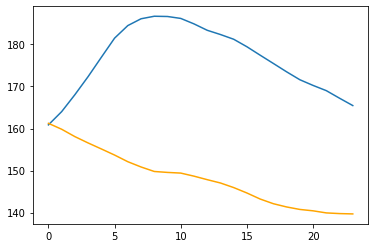

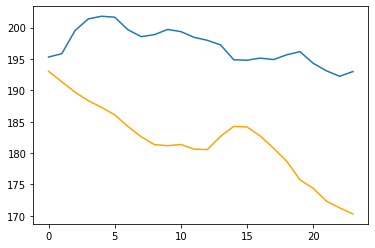

In [10]:
import matplotlib.pyplot as plt
plt.plot(mealDfAvg)
plt.plot(noMealDfAvg,color='orange')
plt.show()

plt.plot(mealDfAvg2)
plt.plot(noMealDfAvg2,color='orange')
plt.show()

        0      1      2      3      4      5      6      7      8      9   \
0    248.0  241.0  231.0  220.0  222.0  222.0  222.0  223.0  224.0  228.0   
1     83.0   87.0  100.0  112.0  121.0  125.0  130.0  132.0  123.0  112.0   
2    201.0  194.0  188.0  183.0  181.0  176.0  170.0  168.0  169.0  172.0   
3    125.0  122.0  123.0  130.0  149.0  162.0  169.0  179.0  192.0  203.0   
4     55.0   58.0   70.0   77.0   87.0   99.0  108.0  112.0  120.0  127.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
781  159.0  159.0  159.0  161.0  164.0  166.0  168.0  168.0  164.0  159.0   
782  159.0  159.0  159.0  161.0  164.0  166.0  168.0  168.0  164.0  159.0   
783  159.0  159.0  159.0  161.0  164.0  166.0  168.0  168.0  164.0  159.0   
784  234.0  225.0  195.0  185.0  176.0  169.0  163.0  158.0  156.0  153.0   
785  234.0  225.0  195.0  185.0  176.0  169.0  163.0  158.0  156.0  153.0   

     ...     14     15     16     17     18     19     20     21     22    

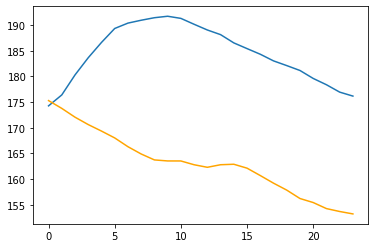

In [12]:
mealDataSet = pandas.concat([mealDf, mealDf2], ignore_index=True, sort = False)
mealDataMatrix = mealDataSet.values.tolist()
noMealDataSet = pandas.concat([noMealDf, noMealDf2], ignore_index=True, sort = False)
noMealDataMatrix = noMealDataSet.values.tolist()
print(mealDataSet)
print(noMealDataSet)

mealDfAvg = mealDataSet.mean(axis=0)
mealDfAvg


noMealDfAvg = noMealDataSet.mean(axis=0)
noMealDfAvg

plt.plot(mealDfAvg)
plt.plot(noMealDfAvg,color='orange')
plt.show()


In [16]:
import numpy as np

In [21]:
from sklearn.model_selection import train_test_split

#Training sequential data using LSTM
Training_data = np.concatenate((mealDataMatrix,noMealDataMatrix), axis=0)
Training_labels = []
for i in range(len(mealDataMatrix)):
    Training_labels.append(1)
for i in range(len(noMealDataMatrix)):
    Training_labels.append(0)
    
    
X = pandas.DataFrame(Training_data)
y = pandas.DataFrame(Training_labels)
Z = pandas.concat([X, y], axis=1, sort=False)

#Randomize data
Total_Data = Z.reindex(np.random.permutation(Z.index))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train


ModuleNotFoundError: No module named 'sklearn'